# Step 1 : Use case - To predict which digit is in the given handwritten image sample.
Problem we are dealing here is to predict actually which digit is written manually in the given image sample. The digit can be single and in between 0 and 9. Since the aim of model is to predict digit in between 0 and 9, it is a multiclass classification problem.

## Domain Analysis
Here data is from mnist (Modified National Institute of Standards and Technology) database. This is a computer vision related problem since data are images. Because of its unstructured representaion, this cases often belongs to Deep learning. 
### Image processing:
Image Processing is a computer technology applied to images that helps us process, analyze and extract useful information from them. It used for several applications such as visualization, image information extraction, pattern recognition, classification and segmentation.

### Machine Learning Image Processing:
Make sure the images are well processed, annotated, and generic for ML image processing. This is where Computer Vision (CV) comes into the picture, it's a field concerning machines being able to understand the image data. Using CV Computers see an input image as an array of pixels, and it depends on the image resolution. Based on the image resolution, it will see height * width * dimension. E.g., An image of a 6 x 6 x 3 array of a matrix of RGB (3 refers to RGB values) and an image of a 4 x 4 x 1 array of a matrix of the grayscale image.

steps:
- Converting all the images into the same format.
- Cropping the unnecessary regions on images.
- Transforming them into numbers for algorithms to learn from them(array of numbers).

These features (data that's processed) are then used in the next phase: to choose and build a machine-learning algorithm to classify unknown feature vectors given an extensive database of feature vectors whose classifications are known. For this, we'll need to choose an ideal algorithm; some of the most popular ones include Bayesian Nets, Decision Trees, Genetic Algorithms, Nearest Neighbors and Neural Nets etc. 
The algorithms learn from the patterns based on the training data with particular parameters. However, we can always fine-tune the trained model based on the performance metrics. Lastly, we can use the trained model to make new predictions on unseen data.
### Deep Learning Image Processing:
Several machine learning image processing techniques leverage deep learning networks. These are a special kind of framework that imitates the human brain to learn from data and make models. One familiar neural network architecture that made a significant breakthrough on image data is Convolution Neural Networks, also called CNNs. The convolutional neural network is built on three primary layers, which are:
- Convolutional Layer
- Pooling Layer
- Fully Connected Layer

**Convolutional layers:** These are the layers where filters are applied to the original image, or to other feature maps in a deep CNN. This is where most of the user-specified parameters are in the network. The most important parameters are the number of kernels and the size of the kernels.

**Pooling layers:** Thes are used to reduce the dimensions of the feature maps. Thus, it reduces the number of parameters to learn and the amount of computation performed in the network. The pooling layer summarises the features present in a region of the feature map generated by a convolution layer.

**Fully Connected Layer:** It is feed forward neural networks. Fully Connected Layers form the last few layers in the network. The input to the fully connected layer is the output from the final Pooling or Convolutional Layer, which is flattened and then fed into the fully connected layer.


# Step 2 : Image data Collection
I am using MNIST Handwritten image dataset. It consists of total 70,000 image instances, 60,000 for training and 10,000 for testing the model. Input is the image pixel intensity measure and output is the class of digit which it belongs. Each instance is a gray scale image of 28x28 pixel size.

In [1]:
## loading required packages

import numpy as np
import time
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

In [2]:
data = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
type(data)

tuple

In [ ]:
data

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

# Step 3 : Identify the independent and dependent variable.
**Input(independent) varible:**
- It is image data, each image is of single gray scale channel, consists of 28x28 pixels (grid like structure) size having intensity value between 0 and 255.

**Output(dependent) variable:** 
- It is labels which can be any value in between 0 and 9.

In [ ]:
## train input data
print(data[0][0].shape)

## train label data
print(data[0][1].shape)

## test input data
print(data[1][0].shape)

## test label data
print(data[1][1].shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
## splitting data into train and test
(X_train, y_train), (X_test, y_test) = data

In [ ]:
print('X_train shape: {}, y_train shape: {}\n\
X_test shape: {}, y_test shape: {}'.format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train shape: (60000, 28, 28), y_train shape: (60000,)
X_test shape: (10000, 28, 28), y_test shape: (10000,)


# Step 4 : Exploring image data 

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
y_train[0]

5

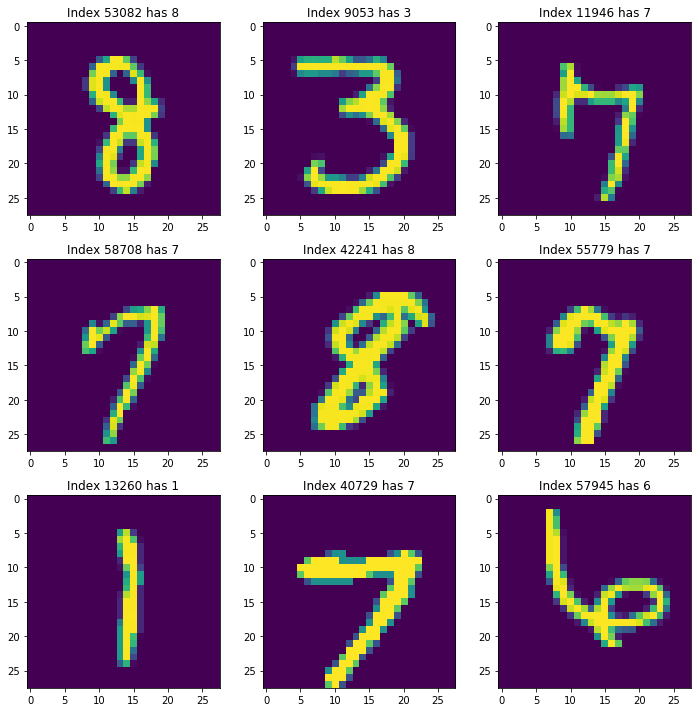

In [ ]:
## Plotting some of random train images 

plt.figure(figsize=(10, 10))
plt_num = 1
for idx in np.random.randint(0, 60000, 9):
    title = "Index "+str(idx)+" has "+str(y_train[idx])
    if plt_num<=9:
        plt.subplot(3, 3, plt_num)
        plt.imshow(X_train[idx])
        plt.title(title)
    plt_num+=1
plt.tight_layout()

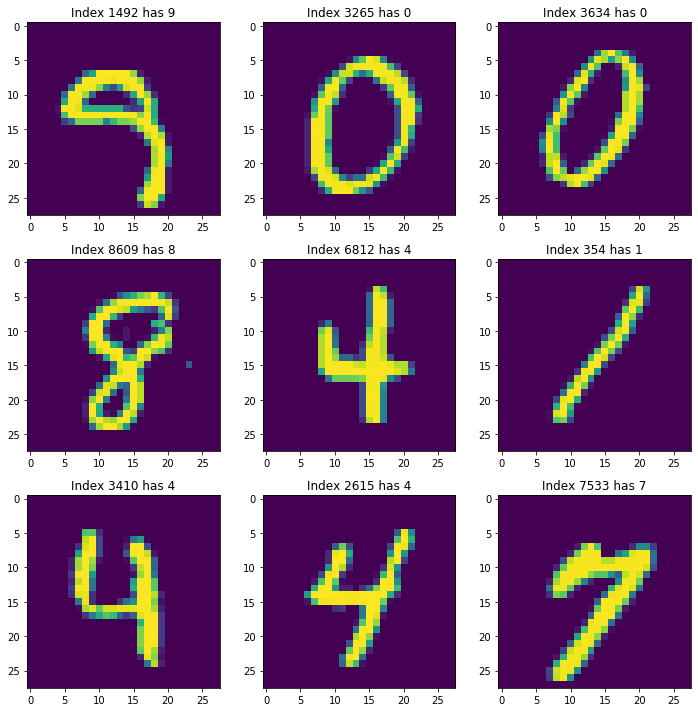

In [ ]:
## ploting some of test samples

plt.figure(figsize=(10, 10))
plt_num = 1
for idx in np.random.randint(0, 10000, 9):
    title = "Index "+str(idx)+" has "+str(y_test[idx])
    if plt_num<=9:
        plt.subplot(3, 3, plt_num)
        plt.imshow(X_test[idx])
        plt.title(title)
    plt_num+=1
plt.tight_layout()

## Checking label distribution

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


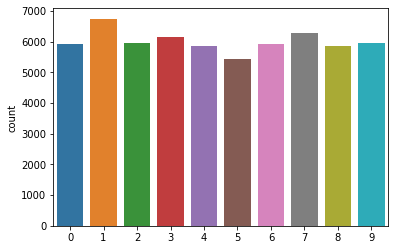

In [ ]:
sb.countplot(y_train)
plt.show()

In [ ]:
def count_labels(y_set, label):
    size = len(y_set)
    count = 0
    for idx in range(size):
        if y_set[idx]==label:
            count+=1
    label_percnt = (count/size)*100
    return str(label)+' has '+str(count)+' ('+str(np.round(label_percnt, 2))+')'

In [ ]:
## counting train labels
for label in range(0, 10):
    print(count_labels(y_train, label))

0 has 5923 (9.87)
1 has 6742 (11.24)
2 has 5958 (9.93)
3 has 6131 (10.22)
4 has 5842 (9.74)
5 has 5421 (9.04)
6 has 5918 (9.86)
7 has 6265 (10.44)
8 has 5851 (9.75)
9 has 5949 (9.92)


Data is almost balanced with small differences in proportion. But let us balance inorder check what would be the performance score of individual labels if data have equal distribution, whether performance increase or not. 

# Step 5 : Data Preprocessing

In [4]:
## conver from integer to float and normalizing to get values between 0 and 1

X_train = X_train.astype('float')/255.0
X_test = X_test.astype('float')/255.0

In [5]:
## changing output data type to integer
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [ ]:
X_train.ndim

3

In [6]:
## converting inputs into 2D arrays 

X_train_2d = X_train.reshape(X_train.shape[0], 28*28)
X_test_2d = X_test.reshape(X_test.shape[0], 28*28)

In [ ]:
X_train_2d.ndim

2

Here 3D Input data converted into 2D array inorder to check with sklearn algorithms.

In [ ]:
X_train_2d.shape

(60000, 784)

# Step 6 : Model Selection and Building

In this step first I cross check with some of sklearn algorithms then on keras neural networks and last on keras convolutional neural network, and I select best suitable algorithm that have high score. After this, on next step I move on to do hyperparameter tuning on that selected model.

## Checking with Sklearn classifiers

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
models = []

models.append(('LR', LogisticRegression()))
models.append(('KNNC', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('BC', BaggingClassifier()))
models.append(('ABC', AdaBoostClassifier()))
models.append(('MLP', MLPClassifier()))

**Due to system performance issues, have done this checkings with Google colab, also I am unable to check with XGBoost and GradientBoost algorithms.

Let us use 'f1_weighted' metric score for sklearn algorithms.

#### With balancing

In [ ]:
for name, model in models:  
    pipeline = imbpipeline(steps=[['smote', SMOTE(random_state=42)],
                                  ['model', model]])
    kfold = StratifiedKFold(n_splits=5, shuffle=True)
    cv_result = cross_val_score(pipeline, X_train_2d, y_train, scoring='f1_weighted', cv=kfold)
    msg = "%s: %f (%f)" %(name, cv_result.mean(), cv_result.std())
    print(msg)

result on colab

algs  f1_weighted std.deviation
LR:   0.920550    (0.001653)
KNNC: 0.971083    (0.001377)
SVC:  0.978200    (0.001274)
DT:   0.871700    (0.001341)
RFC:  0.968150    (0.001725)
BC:   0.933533    (0.004756)
ABC:  0.724767    (0.022971)   
MLP:  0.975817    (0.001184)

#### Without balancing

In [ ]:
for name, model in models:  
    kfold = StratifiedKFold(n_splits=5, shuffle=True)
    cv_result = cross_val_score(model, X_train_2d, y_train, scoring='f1_weighted', cv=kfold)
    msg = "%s: %f (%f)" %(name, cv_result.mean(), cv_result.std())
    print(msg)

result on colab

algs  f1_weighted std.deviation
LR:    0.920433    (0.001438)
KNNC:  0.970850    (0.001425)
SVC:   0.977833    (0.001516)
DT:    0.869400    (0.002696)
RFC:   0.967283    (0.001299)
BC:    0.938850    (0.003174)
ABC:   0.719083    (0.016897)
MLP:   0.975717    (0.001371)

After checked several sklearn algorithms with and without balancing, and result shows that there is no much improvement between two also between accuracy and f1 weighted average scores. So for this data set balancing is unimportant.

From above, we can found that SVC model perform better compared to other having score 97.8 %.

## Checking with Keras Neural Networks

### With fully connected neural networks

In [ ]:
!pip install keras-tuner --upgrade

In [8]:
## importing packages

from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
import keras_tuner as kt

For ANN input dimension 2D, is same as we use for sklearn. But for output, we need convert value into one-hot vectors, so that output layer can have 10 units.

In [9]:
## Converting each output value into one-hot vectors.

y_train_oht = utils.to_categorical(y_train)
y_test_oht = utils.to_categorical(y_test)
y_train_oht.shape

(60000, 10)

In [ ]:
X_train_2d.shape

(60000, 784)

As a thumb rule, let us start with 2 hidden layers and number of units range in between input and output size as a geometric progression.

In [ ]:
## modelling with 2 hidden layers

model_ann = Sequential()
model_ann.add(Dense(100, input_dim=784, activation='relu'))
model_ann.add(Dense(200, activation='relu'))
model_ann.add(Dense(10, activation='softmax'))
model_ann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 dense_2 (Dense)             (None, 10)                2010      
                                                                 
Total params: 100,710
Trainable params: 100,710
Non-trainable params: 0
_________________________________________________________________


In [ ]:
## early stopping
es_ann = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=4, verbose=1)

## model checkpoint
mc_ann = ModelCheckpoint('model_ann.h5', monitor='val_loss', verbose=1, save_best_only=True)

cb_ann = [es_ann, mc_ann]

In [ ]:
## fitting

tic = time.process_time()
ann_hist = model_ann.fit(X_train_2d, y_train_oht, epochs=50, validation_split=0.25, callbacks=cb_ann)
toc = time.process_time()
print(toc-tic)

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1400/1407 [============================>.] - ETA: 0s - loss: 0.2696 - accuracy: 0.9219WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001A0AF0D8318> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=1

In [ ]:
(75*600)/32

1406.25

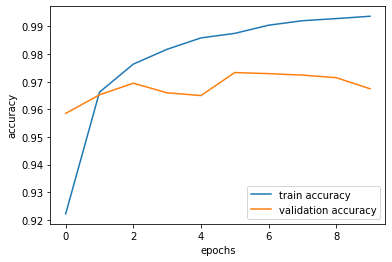

In [ ]:
## accuracy plotting

plt.plot(ann_hist.history['accuracy'], label='train accuracy')
plt.plot(ann_hist.history['val_accuracy'], label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.show()

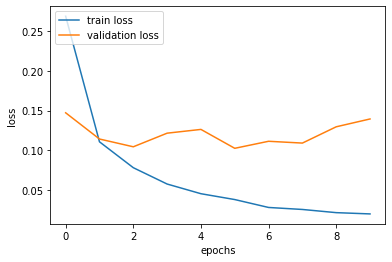

In [ ]:
## loss plotting

plt.plot(ann_hist.history['loss'], label='train loss')
plt.plot(ann_hist.history['val_loss'], label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc='upper left')
plt.show()

### ANN hyperparameter tuning

In [16]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 6)):
        model.add(Dense(units=hp.Int('units_'+str(i),
                                   min_value=10,
                                   max_value=780,
                                   step=50),
                      activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy'])
    return model

In [18]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=3,
    executions_per_trial=3,
    directory='/content/drive/MyDrive/colab/HandwrittenDigit',
    project_name='HWD_classification'
)

In [19]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 6, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 780, 'step': 50, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 780, 'step': 50, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [20]:
tuner.search(X_train_2d, y_train_oht, epochs=5, validation_split=0.25)
tuner.results_summary()

Trial 3 Complete [00h 06m 15s]
val_loss: 0.09842567890882492

Best val_loss So Far: 0.09842567890882492
Total elapsed time: 00h 11m 32s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in /content/drive/MyDrive/colab/HandwrittenDigit/HWD_classification
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
num_layers: 2
units_0: 660
units_1: 710
learning_rate: 0.001
units_2: 60
Score: 0.09842567890882492
Trial summary
Hyperparameters:
num_layers: 3
units_0: 510
units_1: 660
learning_rate: 0.001
units_2: 10
Score: 0.10989082356293996
Trial summary
Hyperparameters:
num_layers: 2
units_0: 110
units_1: 260
learning_rate: 0.0001
Score: 0.15844760835170746


In [24]:
best_model = tuner.get_best_models()[0]

### With convolutional neural networks 

In [ ]:
## importing libraries

from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dropout

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
## image have shape of 28x28 i.e it is gray scale image, so we can reshape it into data array of single color channel by 
## adding '1' extra dimenstion

X_train_cnn = X_train.reshape(X_train.shape[0], 28, 28, 1) # or = np.expand_dims(X_train, -1)
X_test_cnn = X_test.reshape(X_test.shape[0], 28, 28, 1) # or = np.expand_dims(X_test, -1)

In [ ]:
## modelling with convolution layer plus artificial neural network

model_cnn = Sequential()

model_cnn.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model_cnn.add(MaxPool2D(2, 2))

model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(MaxPool2D(2, 2))

model_cnn.add(Flatten())
model_cnn.add(Dropout(0.25))

model_cnn.add(Dense(10, activation='softmax'))

model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)             

In [ ]:
## early stopping
es_cnn = EarlyStopping(monitor='val_loss', mode='min', patience=4, verbose=1)

## model checkpoint creating
mc_cnn = ModelCheckpoint('model_cnn.h5', monitor='val_loss', verbose=1, save_best_only=True)

cb_cnn = [es_cnn, mc_cnn]

In [ ]:
## fitting
cnn_hist = model_cnn.fit(X_train_cnn, y_train_oht, epochs=50, validation_split=0.25, callbacks=cb_cnn)

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1405/1407 [============================>.] - ETA: 0s - loss: 0.2081 - accuracy: 0.9365WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001A0B184B4C8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=1

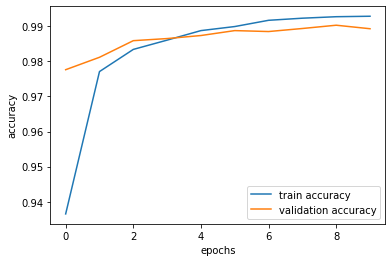

In [ ]:
## plotting accuracy

plt.plot(cnn_hist.history['accuracy'], label='train accuracy')
plt.plot(cnn_hist.history['val_accuracy'], label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.show()

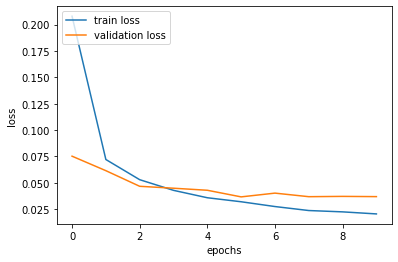

In [ ]:
## loss plotting

plt.plot(cnn_hist.history['loss'], label='train loss')
plt.plot(cnn_hist.history['val_loss'], label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc='upper left')
plt.show()

CNN model show very good performance on train-validation sets compared other modelling that we had one above. So we leave hyperparameter stage.

# Step 7: Final model evaluation on test data

In [ ]:
## loading model for final evaluation with test data 

load_cnn_model = keras.models.load_model('model_cnn.h5')

In [ ]:
## evaluating

test_loss_acc = load_cnn_model.evaluate(X_test_cnn, y_test_oht)
test_loss_acc

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 [==============================] - 3s 7ms/step - loss: 0.0277 - accuracy: 0.9910


[0.027693305164575577, 0.9909999966621399]

In [ ]:
y_pred_cnn = load_cnn_model.predict(X_test_cnn)
y_pred_cnn[:5]

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


array([[3.26979022e-09, 4.66648586e-09, 4.79896880e-06, 1.32416108e-05,
        1.56697971e-11, 1.87242177e-09, 2.43205148e-14, 9.99978900e-01,
        1.67925513e-08, 3.05201365e-06],
       [9.42405750e-05, 3.75511125e-04, 9.99522567e-01, 1.01196047e-08,
        2.90358884e-08, 1.34189404e-11, 6.54141741e-06, 1.38102352e-09,
        1.04683045e-06, 1.96740313e-09],
       [5.65752813e-08, 9.99097228e-01, 6.28543876e-06, 5.72576027e-07,
        4.24741214e-04, 1.43437478e-06, 5.62437435e-06, 4.05277562e-04,
        5.56636260e-05, 3.02143189e-06],
       [9.98099744e-01, 4.01238320e-10, 1.37714881e-06, 3.68418682e-08,
        3.04331763e-07, 1.40925863e-06, 1.84777926e-03, 3.76273128e-08,
        1.37572924e-05, 3.56434321e-05],
       [4.05685235e-10, 9.66480368e-11, 9.18541188e-10, 3.87323201e-10,
        9.99995112e-01, 5.56430735e-11, 6.72288669e-09, 1.22841568e-08,
        1.30194753e-08, 4.83260555e-06]], dtype=float32)

In [ ]:
## converting each output dimension from 2D vector into 1D by selecting higher valued index of vector 
## this is done by selecting index of highest value along axis 1 of 2D vector using numpy 'argmax' method. 

y_pred_cnn = np.argmax(y_pred_cnn, axis=1)
y_pred_cnn[:5]

array([7, 2, 1, 0, 4], dtype=int64)

In [ ]:
## classification report

print(classification_report(y_test, y_pred_cnn))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
accuracy_score(y_pred_cnn, y_test)

0.991

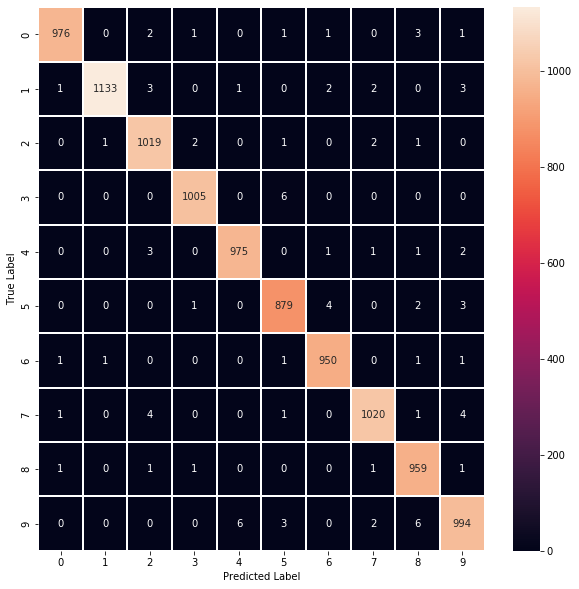

In [ ]:
## ploting confusion matrix

cmtrx = confusion_matrix(y_pred_cnn, y_test)
plt.figure(figsize=(10, 10))
sb.heatmap(cmtrx, annot=True, fmt='d', linewidths=1)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Conclusion
For classifying Handwritten digit images, we have found Convolutional neural network with two Convolutional Layer and a single dense layer perform better. Our model achieved:

**Accuracy**(in percentage)
- Train : 99.28%
- Validation : 98.93%
- Test : 99.09%

**Loss**
- Train : 0.0205
- Validation : 0.0369
- Test : 0.0277

From these metrics scores, one can find the model has maintained well in between high Bias and high Variance because loss difference between train and test is very small. Thus I hope our model will generalize well on unseen data.